# Custom CNN and Transfer Learning

Step 1. Create your own custom dataset featuring 3 custom categories of at least 100 images each

Step 2. Split this data between 80% training and 20% test

Step 3. Preprocess the data as you see fit

Step 4. Create a Convolutional Neural Network model to learn about your training set 

Step 5. Make predictions on the test data and compare them to the expected categories

Step 6: Use GoogleNet(InceptionNet) and add a LinearLayer on top of it.

Step 7: Train the GoogleNet model and compare the accuracy with the first model.

## Step 1. Create your own custom dataset featuring 3 custom categories of at least 100 images each

Displaying the first image in the 'Cats' category:


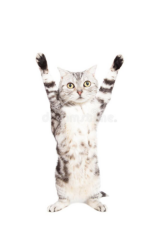

In [1]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Directory where your images are stored
data_dir = "/Users/pari/Documents/2nd Year/4th sem/DATA 255/Assignment/Assignment 3/Images"

# List of categories (subdirectories) in the data directory
categories = [category for category in os.listdir(data_dir) if not category.startswith('.')]

# Dictionary to store image paths for each category
image_paths = {}

# Iterate through categories
for category in categories:
    # Construct path to category directory
    category_dir = os.path.join(data_dir, category)
    # Check if category directory exists
    if os.path.isdir(category_dir):
        # Get list of image files in the category directory
        image_files = glob.glob(os.path.join(category_dir, "*.jpg"))  # Assuming images are in JPEG format
        # Store image paths for the category
        image_paths[category] = image_files
    else:
        print(f"Warning: Category directory '{category}' not found or empty.")

# Example: Display the first image in the 'cats' category
if 'Cats' in image_paths and len(image_paths['Cats']) > 0:
    first_image_path = image_paths['Cats'][0]
    print("Displaying the first image in the 'Cats' category:")
    image = Image.open(first_image_path)
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
else:
    print("No images found in the 'Cats' category.")


In [3]:
import os

# Directory where your images are stored
data_dir = "/Users/pari/Documents/2nd Year/4th sem/DATA 255/Assignment/Assignment 3/Images"

# Count total number of images in the Image folder
total_images_all = 0
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):  # Adjust for your image formats
            total_images_all += 1

print("Total number of images in the 'Image' folder:", total_images_all)



Total number of images in the 'Image' folder: 3344


In [4]:
import os
from PIL import Image

# Directory where your images are stored
data_dir = "/Users/pari/Documents/2nd Year/4th sem/DATA 255/Assignment/Assignment 3/Images"

# List of categories
categories = ["Cats", "Dogs", "Bird"]

# Loop through each category
for category in categories:
    # Construct path to category directory
    category_dir = os.path.join(data_dir, category)
    # Get a list of image files in the category directory
    image_files = [file for file in os.listdir(category_dir) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    # Display the first image in the category if available
    if image_files:
        # Get the path of the first image in the category
        first_image_path = os.path.join(category_dir, image_files[0])
        # Open and display the image
        image = Image.open(first_image_path)
        image.show()
        # Optionally print the path of the displayed image
        print(f"Displaying the first image in the '{category}' category:", first_image_path)
    else:
        print(f"No images found in the '{category}' category.")


Displaying the first image in the 'Cats' category: /Users/pari/Documents/2nd Year/4th sem/DATA 255/Assignment/Assignment 3/Images/Cats/images - 2024-02-17T210504.662.jpeg
Displaying the first image in the 'Dogs' category: /Users/pari/Documents/2nd Year/4th sem/DATA 255/Assignment/Assignment 3/Images/Dogs/images - 2024-02-17T213516.739.jpeg
Displaying the first image in the 'Bird' category: /Users/pari/Documents/2nd Year/4th sem/DATA 255/Assignment/Assignment 3/Images/Bird/images - 2024-02-17T211907.294.png


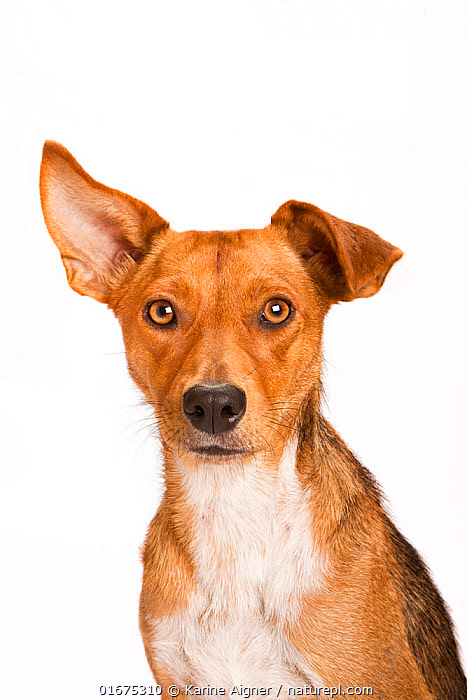

In [5]:
Image.open(str(image_paths['Dogs'][0]))

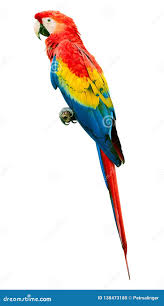

In [6]:
import pathlib
Birds_path = pathlib.Path(data_dir) / "Bird"  # Ensure correct path using pathlib
Birds_img = list(Birds_path.glob('*.jpeg'))  # Adjust file extension if needed

Image.open(str(Birds_img[0]))

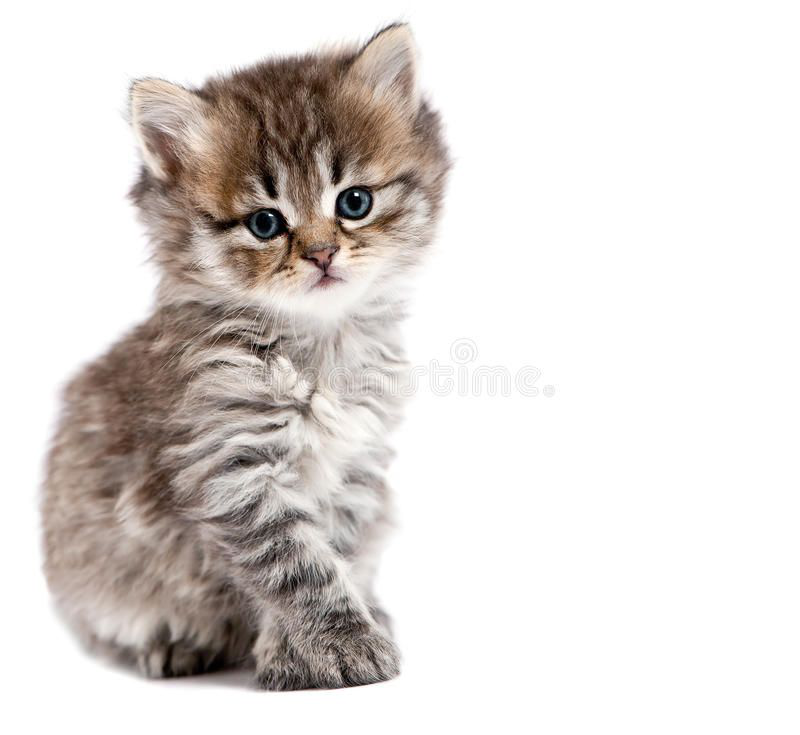

In [7]:
Image.open(str(image_paths['Cats'][4]))


In [8]:
batch_size = 32

In [9]:
pip install torchvision


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: /Users/pari/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Step 3. Preprocess the data as you see fit

In [10]:
from torchvision import datasets, transforms

# 1. Load the dataset
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #Rescale
])

## Step 2. Split this data between 80% training and 20% test

In [11]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

dataset = ImageFolder(data_dir, transform = data_transform)
train_size = int(0.8 * len(dataset))  # Calculate 80% of dataset size
test_size = len(dataset) - train_size  # Calculate 20% of dataset size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [12]:
print(len(train_dataset))

2692


In [13]:
print(len(test_dataset))

673


You can find the class names in the `class_names` attribute on these datasets. These correspond to the directory names in alphabetical order.

In [14]:
class_names = dataset.classes
print(class_names)

['Bird', 'Cats', 'Dogs']


In [15]:
train_dataloader = DataLoader(train_dataset, batch_size=32)
test_dataloader = DataLoader(test_dataset, batch_size=32)

## Visualize the data

Here are the first 9 images from the training dataset.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


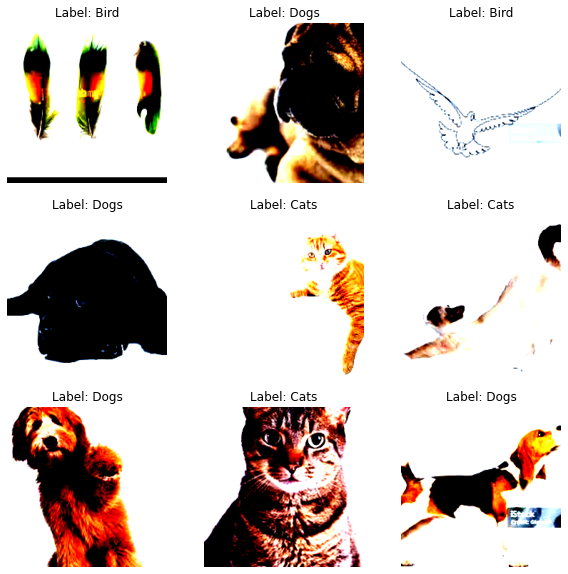

In [16]:
import torch
import torchvision
import matplotlib.pyplot as plt

# Assuming train_dl is your PyTorch DataLoader
data_iter = iter(train_dataloader)

# Fetch the first batch of data
images, labels = next(data_iter)

# Plot the first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    image = images[i].permute(1, 2, 0).numpy()  # Convert tensor to numpy array
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Label: {class_names[labels[i].item()]}")
    plt.axis("off")

plt.show()


In [17]:
for image_batch, labels_batch in train_dataloader:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

torch.Size([32, 3, 224, 224])
torch.Size([32])


The image_batch is a torch tensor of the shape (32, 3, 224, 224). This is a batch of 32 images of shape 224x224x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

In [18]:
print(len(train_dataloader.dataset))
print(train_dataloader.dataset[0][0].shape)
print(train_dataloader.dataset[1][0].shape)

2692
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


In [19]:
print(images.shape)
print(labels.shape)

torch.Size([32, 3, 224, 224])
torch.Size([32])


# Step 4. Create a Convolutional Neural Network model to learn about your training set

# Build the model

In [20]:
import torch
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self, num_classes, img_height, img_width):
        super(CNNModel, self).__init__()
        self.rescaling = nn.Sequential(
            nn.Conv2d(3, 3, kernel_size=1),
            nn.BatchNorm2d(3),
            nn.ReLU(inplace=True)
        )
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * (img_height // 8) * (img_width // 8), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.rescaling(x)
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.flatten(x)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define input dimensions
img_height, img_width = 224, 224
# Define the number of classes
num_classes = 3

# Instantiate the model
model = CNNModel(num_classes, img_height, img_width)


Using Adam Optimizer and Cross Entropy Loss loss function.



In [21]:
import torch.optim as optim
import torch.nn.functional as F

# Define the optimizer
optimizer = optim.Adam(model.parameters())

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the metrics (accuracy)
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Define the training loop
def train_model(model, train_dl, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()  # Set the model to train mode
        train_loss = 0.0
        train_acc = 0.0

        for images, labels in train_dl:
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize

            # Compute training accuracy
            acc = accuracy(outputs, labels)
            train_acc += acc.item() * images.size(0)

            # Track training loss
            train_loss += loss.item() * images.size(0)

        # Print training statistics
        epoch_loss = train_loss / len(train_dl.dataset)
        epoch_acc = train_acc / len(train_dl.dataset)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")
        
def test_model(model, test_dl):
    model.eval()
    test_acc = 0.0
    for images, labels in test_dl:
        outputs = model(images)
        acc = accuracy(outputs, labels)
        test_acc += acc.item() * images.size(0)
    final_acc = test_acc / len(test_dl.dataset)
    print(f"Test Accuracy: {final_acc:.4f}")

# Train the model
num_epochs = 10  # Choose the number of epochs
train_model(model, train_dataloader, criterion, optimizer, num_epochs)

Epoch 1/10, Loss: 1.0794, Accuracy: 0.3893
Epoch 2/10, Loss: 0.9853, Accuracy: 0.4903
Epoch 3/10, Loss: 0.8429, Accuracy: 0.6051
Epoch 4/10, Loss: 0.6752, Accuracy: 0.7002
Epoch 5/10, Loss: 0.5059, Accuracy: 0.7935
Epoch 6/10, Loss: 0.3743, Accuracy: 0.8548
Epoch 7/10, Loss: 0.3078, Accuracy: 0.8811
Epoch 8/10, Loss: 0.1848, Accuracy: 0.9402
Epoch 9/10, Loss: 0.1290, Accuracy: 0.9629
Epoch 10/10, Loss: 0.0699, Accuracy: 0.9822


## Step 5. Make predictions on the test data and compare them to the expected categories

In [22]:
test_model(model, test_dataloader)

Test Accuracy: 0.5617


### CNN Model with Data Augmentation
Training loop with Data Augmentation layers to avoid overfitting

In [23]:
import torch.optim as optim
import torch.nn.functional as F

# Define the optimizer
optimizer = optim.Adam(model.parameters())

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the metrics (accuracy)
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Define the training loop
def train_model(model, train_dl, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()  # Set the model to train mode
        train_loss = 0.0
        train_acc = 0.0

        for images, labels in train_dl:
            data_augmented_inputs = torch.stack([transforms.RandomHorizontalFlip()(img) for img in images])
            data_augmented_inputs = torch.stack([transforms.RandomRotation(degrees=10)(img) for img in data_augmented_inputs])
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize

            # Compute training accuracy
            acc = accuracy(outputs, labels)
            train_acc += acc.item() * images.size(0)

            # Track training loss
            train_loss += loss.item() * images.size(0)

        # Print training statistics
        epoch_loss = train_loss / len(train_dl.dataset)
        epoch_acc = train_acc / len(train_dl.dataset)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")
        
def test_model(model, test_dl):
    model.eval()
    test_acc = 0.0
    for images, labels in test_dl:
        outputs = model(images)
        acc = accuracy(outputs, labels)
        test_acc += acc.item() * images.size(0)
    final_acc = test_acc / len(test_dl.dataset)
    print(f"Test Accuracy: {final_acc:.4f}")

# Train the model
num_epochs = 10  # Choose the number of epochs
train_model(model, train_dataloader, criterion, optimizer, num_epochs)

Epoch 1/10, Loss: 0.0564, Accuracy: 0.9870
Epoch 2/10, Loss: 0.0532, Accuracy: 0.9859
Epoch 3/10, Loss: 0.0432, Accuracy: 0.9900
Epoch 4/10, Loss: 0.0394, Accuracy: 0.9911
Epoch 5/10, Loss: 0.0326, Accuracy: 0.9915
Epoch 6/10, Loss: 0.0368, Accuracy: 0.9881
Epoch 7/10, Loss: 0.0319, Accuracy: 0.9926
Epoch 8/10, Loss: 0.0266, Accuracy: 0.9929
Epoch 9/10, Loss: 0.0232, Accuracy: 0.9944
Epoch 10/10, Loss: 0.0157, Accuracy: 0.9944


In [24]:
test_model(model, test_dataloader)

Test Accuracy: 0.5795


From both CNN and CNN with Augmentation models, we see a big difference between the training accuracy and testing accuracy. This shows that there is overfitting in the data.

tensor([[11.6693, -8.1586, -2.3293]])
This image most likely belongs to Bird with a 100.00% confidence.


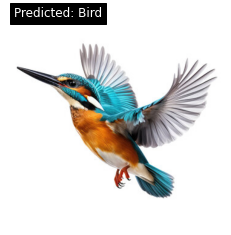

In [25]:
# Load and preprocess the unseen image
image_path = '/Users/pari/Documents/2nd Year/4th sem/DATA 255/Assignment/Assignment 3/Test/bird_test.jpeg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

# Perform inference
with torch.no_grad():
    model.eval()
    output = model(input_batch)
    
print(output)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
#class_names = ['daisy', 'dandelion']  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]
probabilities = torch.softmax(output, dim=1)
confidence = probabilities[0][predicted_class.item()].item()
print(f"This image most likely belongs to {predicted_class_name} with a {confidence*100:.2f}% confidence.")

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='Black')
plt.show()

This image most likely belongs to Dogs with a 99.50% confidence.


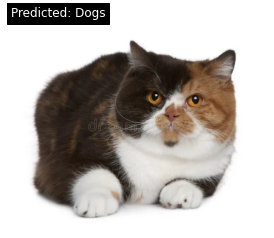

In [26]:
# Load and preprocess the unseen image
image_path = '/Users/pari/Documents/2nd Year/4th sem/DATA 255/Assignment/Assignment 3/Test/cat_test.webp'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

# Perform inference
with torch.no_grad():
    model.eval()
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
#class_names = ['daisy', 'dandelion']  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]
probabilities = torch.softmax(output, dim=1)
confidence = torch.max(probabilities).item()
print(f"This image most likely belongs to {predicted_class_name} with a {confidence*100:.2f}% confidence.")

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='Black')
plt.show()

This image most likely belongs to Dogs with a 74.93% confidence.


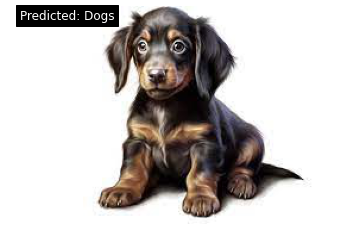

In [27]:
# Load and preprocess the unseen image
image_path = '/Users/pari/Documents/2nd Year/4th sem/DATA 255/Assignment/Assignment 3/Test/dog_test.jpeg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

# Perform inference
with torch.no_grad():
    model.eval()
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
#class_names = ['daisy', 'dandelion']  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]
probabilities = torch.softmax(output, dim=1)
confidence = torch.max(probabilities).item()
print(f"This image most likely belongs to {predicted_class_name} with a {confidence*100:.2f}% confidence.")

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='Black')
plt.show()

## Step 6: Use GoogleNet(InceptionNet) and add a LinearLayer on top of it.

### Using InceptionNet Model with Linear Layer for Output

In [28]:
from torchvision import datasets, transforms

# 1. Load the dataset
data_transform = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [29]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

dataset = ImageFolder(data_dir, transform = data_transform)
train_size = int(0.8 * len(dataset))  # Calculate 80% of dataset size
test_size = len(dataset) - train_size  # Calculate 20% of dataset size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [30]:
train_dataloader = DataLoader(train_dataset, batch_size=32)
test_dataloader = DataLoader(test_dataset, batch_size=32)

In [31]:
# Load the pre-trained ResNet-18 model
model = torch.hub.load('pytorch/vision:v0.10.0', 'inception_v3', pretrained=True)

Using cache found in /Users/pari/.cache/torch/hub/pytorch_vision_v0.10.0
/Users/pari/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/pari/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [32]:
model.fc = nn.Linear(model.fc.in_features, 3)
model.aux_logits = False

In [33]:
# Freeze all layers except the final classification layer
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False

In [34]:
import torch.optim as optim
import torch.nn.functional as F

# Define the optimizer
optimizer = optim.Adam(model.parameters())

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the metrics (accuracy)
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Define the training loop
def train_model(model, train_dl, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()  # Set the model to train mode
        train_loss = 0.0
        train_acc = 0.0

        for images, labels in train_dl:
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize

            # Compute training accuracy
            acc = accuracy(outputs, labels)
            train_acc += acc.item() * images.size(0)

            # Track training loss
            train_loss += loss.item() * images.size(0)

        # Print training statistics
        epoch_loss = train_loss / len(train_dl.dataset)
        epoch_acc = train_acc / len(train_dl.dataset)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")
        
def test_model(model, test_dl):
    model.eval()
    test_acc = 0.0
    for images, labels in test_dl:
        outputs = model(images)
        acc = accuracy(outputs, labels)
        test_acc += acc.item() * images.size(0)
    final_acc = test_acc / len(test_dl.dataset)
    print(f"Test Accuracy: {final_acc:.4f}")

# Train the model
num_epochs = 10  # Choose the number of epochs
train_model(model, train_dataloader, criterion, optimizer, num_epochs)

Epoch 1/10, Loss: 0.6258, Accuracy: 0.7834
Epoch 2/10, Loss: 0.3857, Accuracy: 0.8733
Epoch 3/10, Loss: 0.3484, Accuracy: 0.8756
Epoch 4/10, Loss: 0.3176, Accuracy: 0.8845
Epoch 5/10, Loss: 0.2950, Accuracy: 0.8982
Epoch 6/10, Loss: 0.2904, Accuracy: 0.8956
Epoch 7/10, Loss: 0.2720, Accuracy: 0.9056
Epoch 8/10, Loss: 0.2586, Accuracy: 0.9075
Epoch 9/10, Loss: 0.2598, Accuracy: 0.9023
Epoch 10/10, Loss: 0.2562, Accuracy: 0.9101


In [35]:
test_model(model, test_dataloader)

Test Accuracy: 0.8945


This image most likely belongs to Bird with a 100.00% confidence.


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


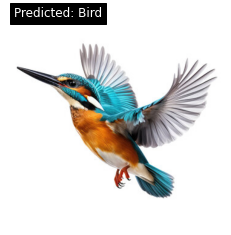

In [36]:
# Load and preprocess the unseen image
image_path = '/Users/pari/Documents/2nd Year/4th sem/DATA 255/Assignment/Assignment 3/Test/bird_test.jpeg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

# Perform inference
with torch.no_grad():
    model.eval()
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
#class_names = ['daisy', 'dandelion']  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]
probabilities = torch.softmax(output, dim=1)
confidence = torch.max(probabilities).item()
print(f"This image most likely belongs to {predicted_class_name} with a {confidence*100:.2f}% confidence.")

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='Black')
plt.show()

This image most likely belongs to Cats with a 100.00% confidence.


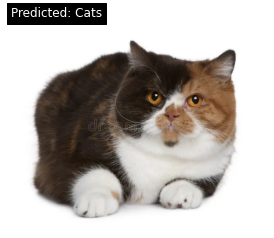

In [37]:
# Load and preprocess the unseen image
image_path = '/Users/pari/Documents/2nd Year/4th sem/DATA 255/Assignment/Assignment 3/Test/cat_test.webp'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

# Perform inference
with torch.no_grad():
    model.eval()
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
#class_names = ['daisy', 'dandelion']  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]
probabilities = torch.softmax(output, dim=1)
confidence = torch.max(probabilities).item()
print(f"This image most likely belongs to {predicted_class_name} with a {confidence*100:.2f}% confidence.")

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='Black')
plt.show()

This image most likely belongs to Dogs with a 100.00% confidence.


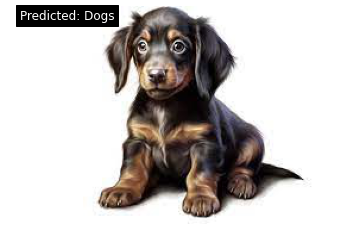

In [38]:
# Load and preprocess the unseen image
image_path = '/Users/pari/Documents/2nd Year/4th sem/DATA 255/Assignment/Assignment 3/Test/dog_test.jpeg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

# Perform inference
with torch.no_grad():
    model.eval()
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
#class_names = ['daisy', 'dandelion']  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]
probabilities = torch.softmax(output, dim=1)
confidence = torch.max(probabilities).item()
print(f"This image most likely belongs to {predicted_class_name} with a {confidence*100:.2f}% confidence.")

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='Black')
plt.show()

## Step 7: Train the GoogleNet model and compare the accuracy with the first model.

Custom CNN Model:

Training Accuracy: 0.9822
Testing Accuracy: 0.5617

GoogleNet Inception V3 Model with Linear Layer:

Training Accuracy: 0.9101
Testing Accuracy: 0.8945

From the accuracy of both models, we can infer that the Custom CNN model overfitted to give a high training accuracy. However, on the test set it didn't perform well.

However, the model created by transfer learning GoogleNet Inception model had similar training and testing accuracy. This shows that the model is generalized. The testing accuracy is also close to 90%, which makes it a better model.